a


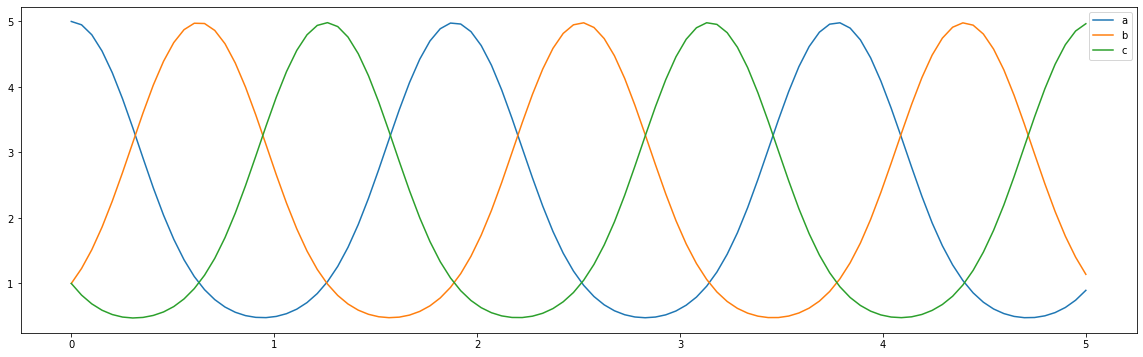

In [2]:
from typing import Dict, Iterable
from sympy import symbols, Eq, Function, lambdify, Symbol, Expr
from scipy.integrate import solve_ivp
import numpy as np
import inspect

from gpac import integrate_odes, plot

a,b,c = symbols('a b c')

rps = {
    a: -a*b + c*a,
    b: -b*c + a*b,
    c: -c*a + b*c,
}
inits = {
    a: 5,
    b: 1,
    c: 1,
}

plot(rps, inits, times=np.linspace(0, 5, 100), figure_size=(20,6))

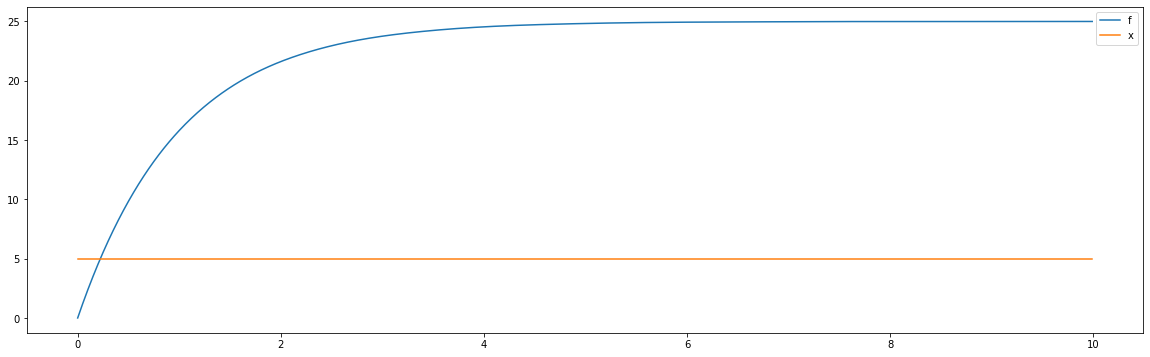

In [7]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(20, 6))

def odes(t, vals):
    f,x = vals
    fp = x*x - f
    xp = 0
    return [fp, xp]

f_init = 0
x_init = 5
inits = [f_init, x_init]

times = np.arange(0.0, 10.0, 0.01)
sol = solve_ivp(odes, [times[0], times[-1]], y0=inits, t_eval=times)
# print(sol.t)
# print(sol.y)
plt.plot(sol.t, sol.y[0], label='f')
plt.plot(sol.t, sol.y[1], label='x')
plt.legend()
plt.show()

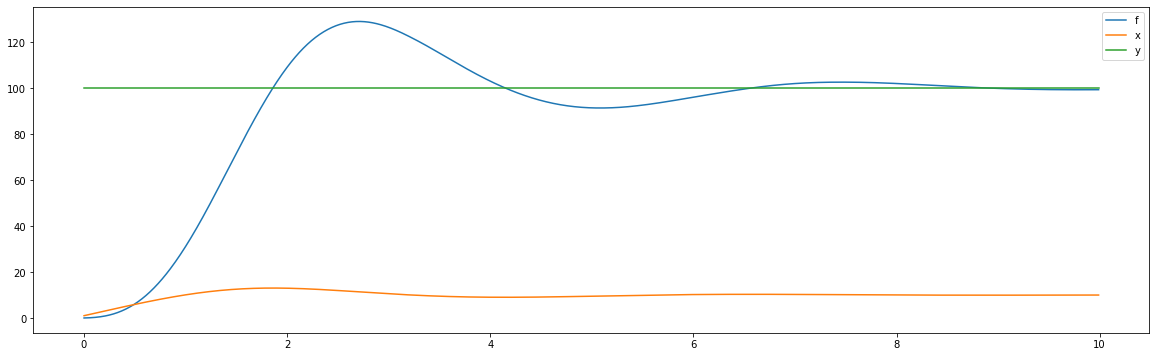

In [8]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(20, 6))

slowdown = 0.1

def odes(t, vals):
    f,x,y = vals
    fp = (x*x - f)
    xp = (y-f)*slowdown
    yp = 0
    return [fp, xp, yp]

f_init = 0
x_init = 1
y_init = 100
inits = [f_init, x_init, y_init]

times = np.arange(0.0, 1/slowdown, 0.01)
sol = solve_ivp(odes, [times[0], times[-1]], y0=inits, t_eval=times)
# print(sol.t)
# print(sol.y)
plt.plot(sol.t, sol.y[0], label='f')
plt.plot(sol.t, sol.y[1], label='x')
plt.plot(sol.t, sol.y[2], label='y')
plt.legend()
plt.show()

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]


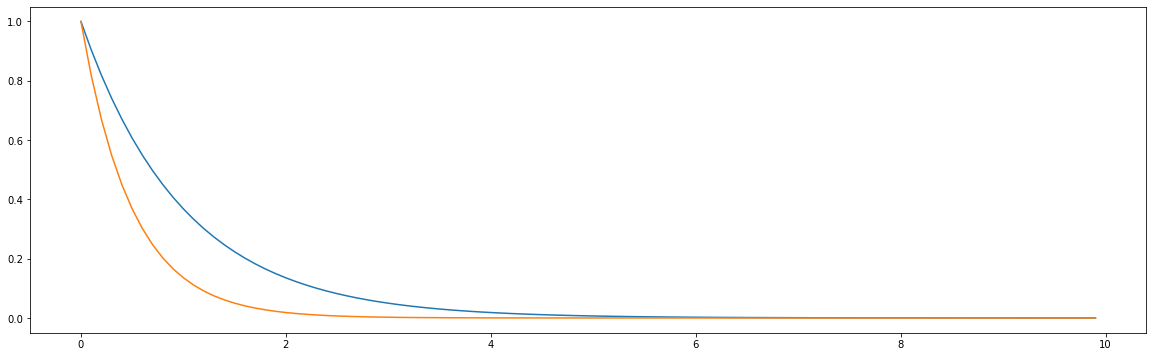

In [9]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(20, 6))

def exponential_decay(t, y): 
    return [-y[0], -2*y[1]]

times = np.arange(0.0, 10.0, 0.1)
sol = solve_ivp(exponential_decay, [0.0,10.0], y0=[1,1], t_eval=times)
print(sol.t)
plt.plot(sol.t, sol.y[0])
plt.plot(sol.t, sol.y[1])

Generating, compiling, and loading C code.
generated C code for f


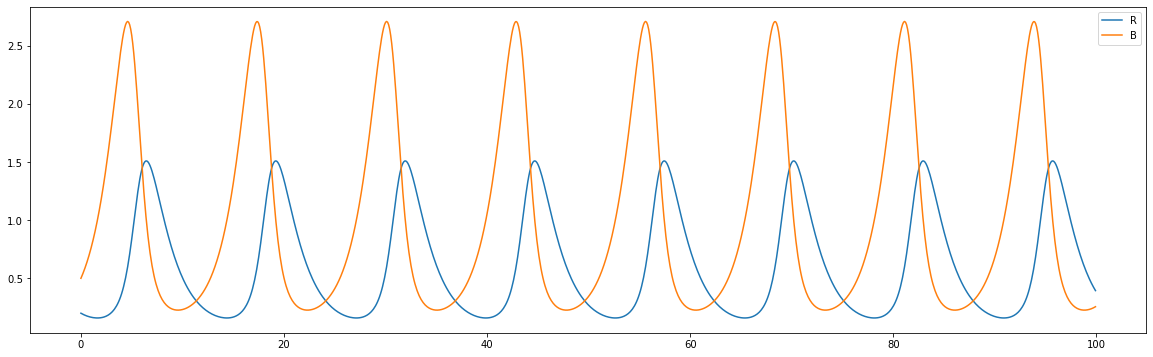

In [5]:
# https://jitcode.readthedocs.io/en/latest/#an-explicit-example
from jitcode import y, jitcode
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(20, 6))

lamb  = 0.6
phi   = 1.0
omega = 0.5
nu    = 0.5

R,B = dynvars = [ y(i) for i in range(2) ]
lotka_volterra_diff = {
    B:   lamb*B - phi*R*B,
    R: -omega*R +  nu*R*B,
}
ODE = jitcode(lotka_volterra_diff)

ODE.set_integrator("dopri5")
initial_state = { R: 0.2, B: 0.5 }
ODE.set_initial_value(initial_state,0.0)

times = np.arange(0.0,100,0.1)
values = { R: [], B: [] }

for time in times:
    ODE.integrate(time)
    for dynvar in dynvars:
        values[dynvar].append(ODE.y_dict[dynvar])

for (key, value), label in zip(values.items(), ['R', 'B']):
#     print(f'key = "{key}"')
#     print(f'value for key {key}:\n{value}')
#     print(f'value for key {key}:\n{values[key]}')
    plt.plot(times, value, label=label)
# plt.plot(times, values['y(1)'], label='B')
plt.legend()
plt.show()

In [1]:
from sympy import symbols, Eq, Function, lambdify
from sympy.solvers.ode.systems import dsolve_system
from scipy.integrate import solve_ivp
import numpy as np

t = symbols('t')
x = Function('x')(t)
y = Function('y')(t)
f = Function('f')(t)
xp = x.diff(t)
fp = f.diff(t)
yp = y.diff(t)
system = [
    Eq(fp, x*x - f),
    Eq(xp, y - f),
    Eq(yp, 0),
]
func_dot = [
    x*x - f,
    y - f,
    0,
]
func = lambdify((t, f, x, y), func_dot)
ics = {f: 0, x: 0, y: 81}
k_vals = np.array([0.42, 0.17])
func0 = [0, 0, 81]
t_eval = np.linspace(0, 10, 50)
solution = solve_ivp(func, (0, 10), func0, t_eval=t_eval, args=k_vals)
print(solution)
# dsolve_system(eqs=system, funcs=[f,x,y], t=t, ics=ics)
# dsolve_system(eqs=system, ics=ics)

ValueError: setting an array element with a sequence.